# 1. Load and Understand the Dataset

In [1]:
#Importing the necessary libraries to notebook 

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [2]:
df =pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [5]:
# In the Age column there are unexpected strokes that we saw in the real early ages (babies). Interesting !!
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Look at the data types and empty cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#Looks like we have 201 empty cells in the BMI column.
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [9]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [10]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

# Additional comments and predictions about the dataset. 

**Comments About Dataset** 

* 4.9 % of the data haz stroke value. We might need to user Oversampling or undersmapling techniques to get a better results. 
* Id column is an unique for each of the row. Therefore, it is likely to remove and not use it in our analysis.
* Gender columns likely to have 2 unique value but we have 3 values. Only one column has other value.
* 1544 rows don't have information about the somking status which is unknown. (%30 of total dataset.)
* 201 rows don't have BMI value which is roughly %4  of our dataset. We need to find a solution for that. 
* BMI index seems wrong. Today max BMI valu for adults around 50 or 60 . This value should be used as it is bacause it gives us an idcation of the height to wieght ratio and also different for kids and adults. 
* Positive values defined as 1 in our dataset. Therefore, ever_married column can be trasnformed to 1s and 0s to make it easier.

**Predictions About Dataset**

1. ever_married column  :  This can be a possible impact on the health. Regular life / sleeping times etc. 
2. work_type : This might be an idication for a stress level that give us an idication. Self employed might be more stressful life compared to private compant employed.
3. residence_type : Urban life style can be positive or negative. Not so clear
    a. Urban areas might be less stressfull that have a positive impact compared the Rural areas.
    b. On th other hand,hard to access to health services and regular/quick checks can be negative. 
4. smoking_type : This should be the biggest impact on the stroke status. If not than it is a problem.
5. bmi : This column is an good idication for us to assign the status of the person but should be used like down below beacuse we have babies and adults in the same results. 
    *     If your BMI is less than 18.5 = underweight range.
    *     If your BMI is 18.5 to <25 =  healthy weight range. 
    *     If your BMI is 25.0 to <30 = overweight range. 
    *     If your BMI is 30.0 or higher = obesity range
6. gender : It feels like men more likely to have strokes compared to women.
7. avg_glucose_level : This columne gives us an idication of the status of the diabetes status of the patient.
    *     less than 100 - normal
    *     Between 100 and 125 - prediabetes
    *     Equal or higher 126 - diabetes 

***We will try to discover all of these in the EDA section.***

# 2. EDA (Explotary Data Analysis)

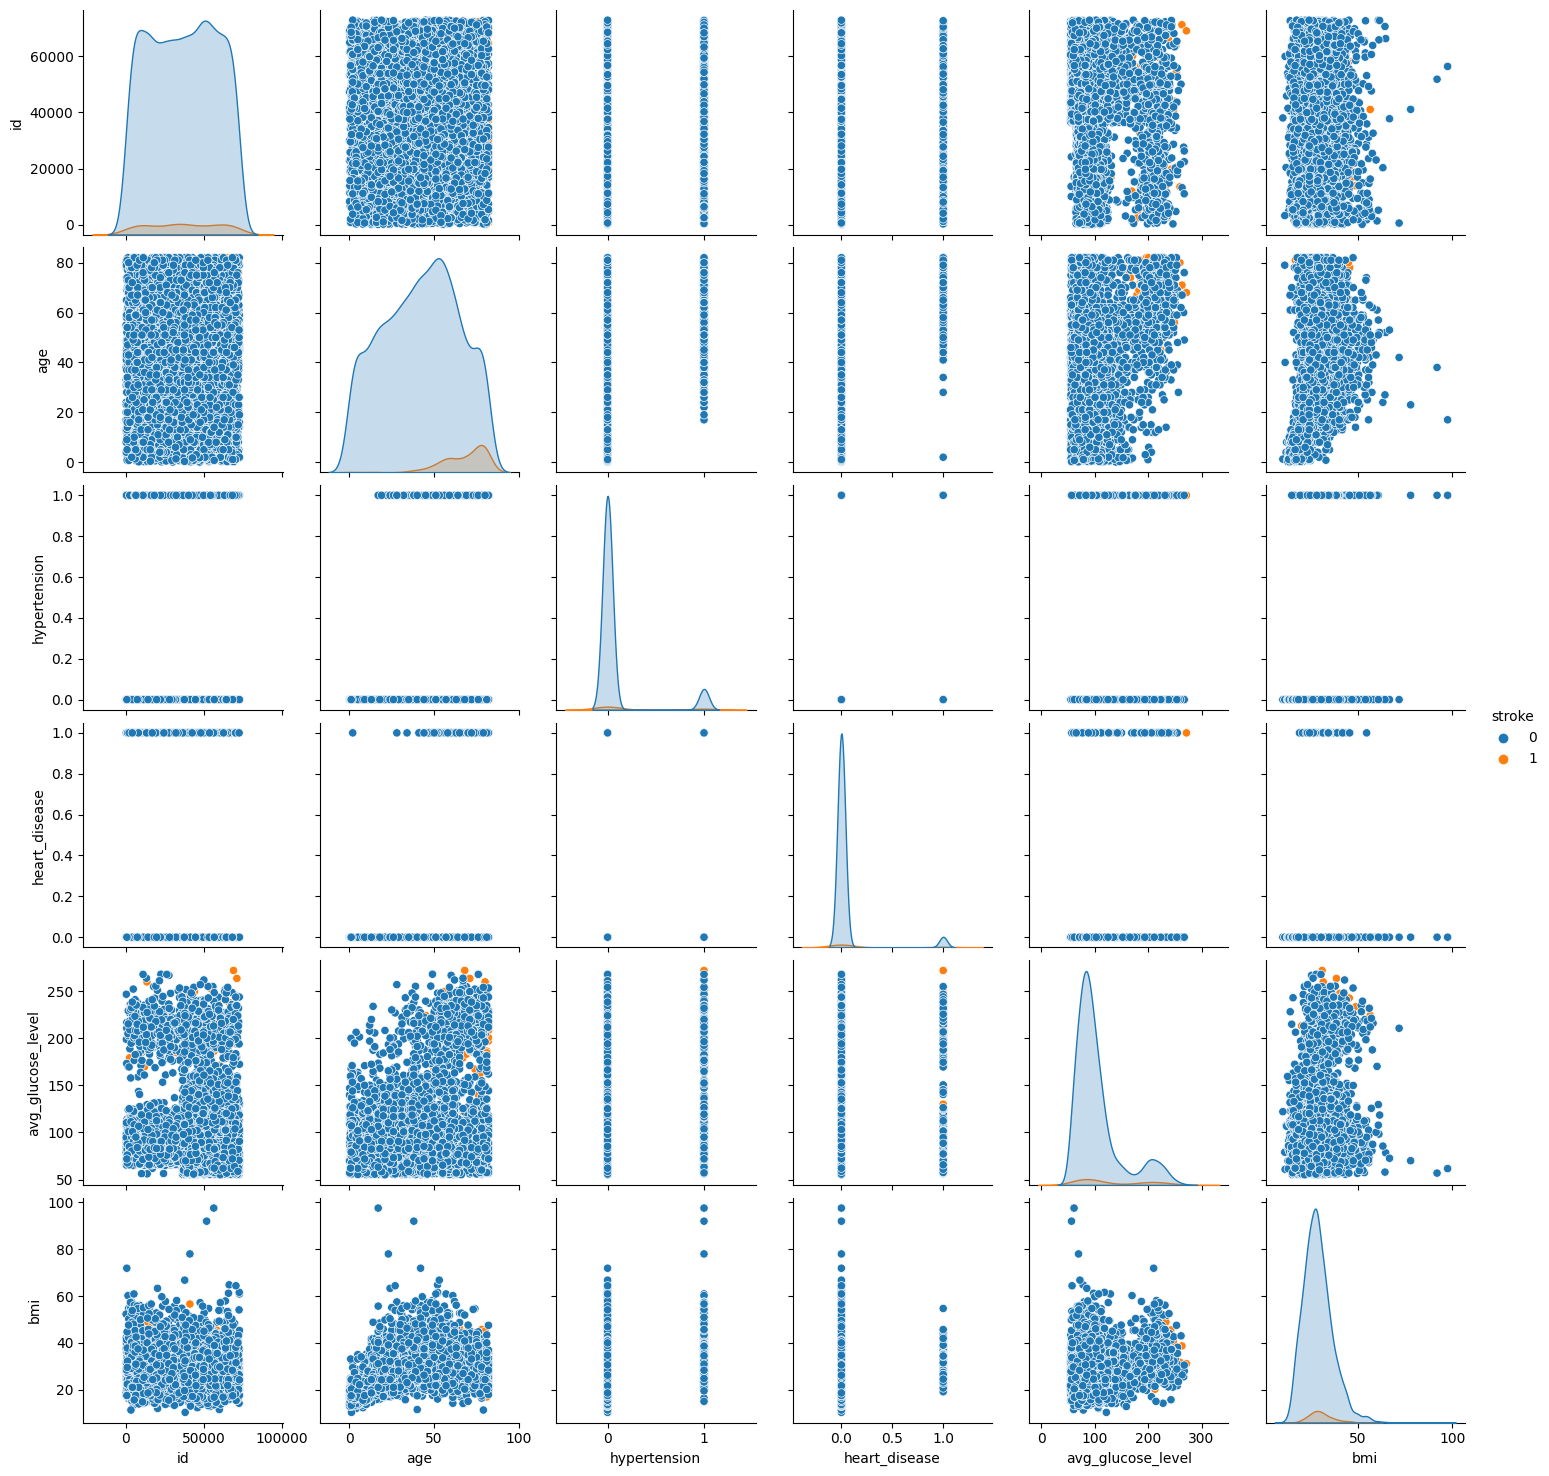

In [11]:
sns.pairplot(df, hue='stroke');

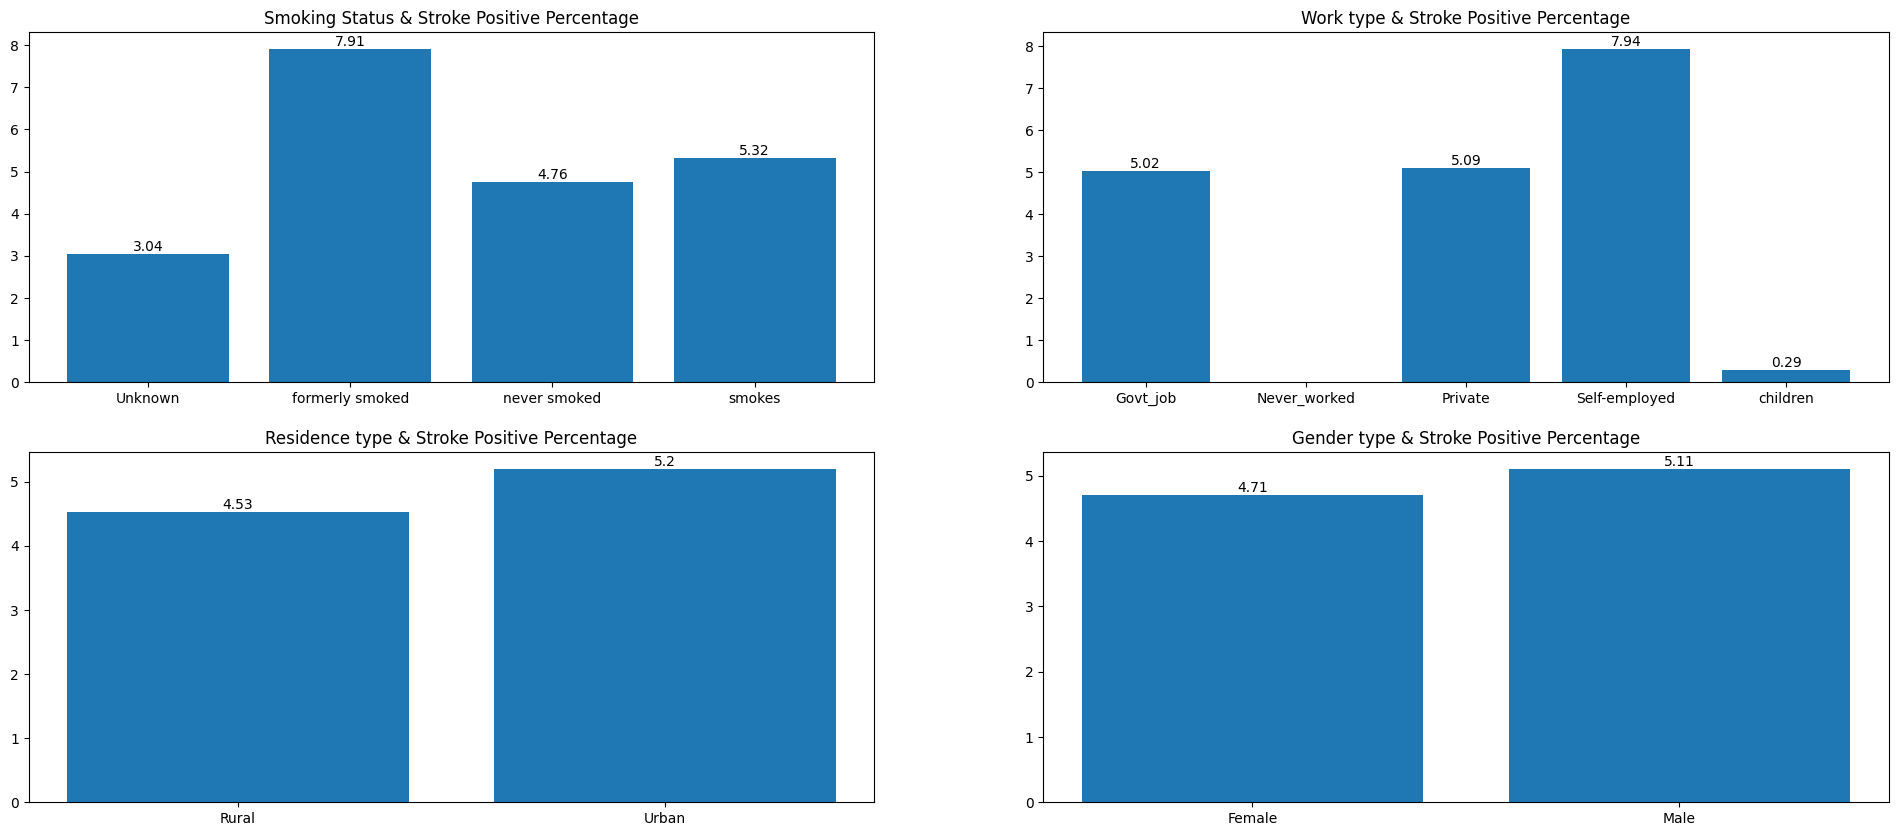

In [12]:
df_smoke = df[['smoking_status','stroke']]
smoke_category_counts = df_smoke.groupby('smoking_status')['stroke'].value_counts().unstack().reset_index()
smoke_category_counts['percentage'] = (smoke_category_counts.iloc[:,2] / (smoke_category_counts.iloc[:,1] +smoke_category_counts.iloc[:,2])) * 100

plt.figure(figsize=[24,10])

plt.subplot(2, 2, 1)
plt.title('Smoking Status & Stroke Positive Percentage')
plt.bar(smoke_category_counts['smoking_status'],smoke_category_counts['percentage'])
for i, value in enumerate(smoke_category_counts['percentage']):
    plt.text(i, value + 0, str(round(value,2)), ha='center', va='bottom')
    
# --------------------------------------------------------------------------------------------------------------------------------------------------------------
df_work_type = df[['work_type','stroke']]
work_type_counts = df_work_type.groupby('work_type')['stroke'].value_counts().unstack().reset_index()
work_type_counts['percentage'] = (work_type_counts.iloc[:,2] / (work_type_counts.iloc[:,1] + work_type_counts.iloc[:,2])) * 100

plt.subplot(2, 2, 2)
plt.title('Work type & Stroke Positive Percentage')
plt.bar(work_type_counts['work_type'],work_type_counts['percentage'])
for i, value in enumerate(work_type_counts['percentage']):
    plt.text(i, value + 0, str(round(value,2)), ha='center', va='bottom')

# --------------------------------------------------------------------------------------------------------------------------------------------------------------
df_residence_type = df[['Residence_type','stroke']]
residence_type_counts = df_residence_type.groupby('Residence_type')['stroke'].value_counts().unstack().reset_index()
residence_type_counts['percentage'] = (residence_type_counts.iloc[:,2] / (residence_type_counts.iloc[:,1] + residence_type_counts.iloc[:,2])) * 100

plt.subplot(2, 2, 3)
plt.title('Residence type & Stroke Positive Percentage')
plt.bar(residence_type_counts['Residence_type'],residence_type_counts['percentage'])
for i, value in enumerate(residence_type_counts['percentage']):
    plt.text(i, value + 0, str(round(value,2)), ha='center', va='bottom')
    
# --------------------------------------------------------------------------------------------------------------------------------------------------------------
df_gender_type = df[['gender','stroke']]
gender_type_counts = df_gender_type.groupby('gender')['stroke'].value_counts().unstack().reset_index()
gender_type_counts['percentage'] = (gender_type_counts .iloc[:,2] / (gender_type_counts .iloc[:,1] + gender_type_counts .iloc[:,2])) * 100

plt.subplot(2, 2, 4)
plt.title('Gender type & Stroke Positive Percentage')
plt.bar(gender_type_counts['gender'],gender_type_counts['percentage'])
for i, value in enumerate(gender_type_counts['percentage']):
    plt.text(i, value + 0, str(round(value,2)), ha='center', va='bottom')

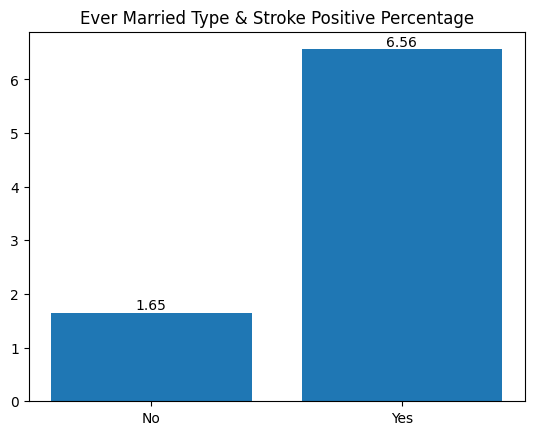

In [13]:
df_ever_married = df[['ever_married','stroke']]
ever_married_type_counts = df_ever_married.groupby('ever_married',)['stroke'].value_counts().unstack().reset_index()
ever_married_type_counts['percentage'] = (ever_married_type_counts .iloc[:,2] / (ever_married_type_counts .iloc[:,1] + ever_married_type_counts .iloc[:,2])) * 100

plt.title('Ever Married Type & Stroke Positive Percentage')
plt.bar(ever_married_type_counts['ever_married'],ever_married_type_counts['percentage'])
for i, value in enumerate(ever_married_type_counts['percentage']):
    plt.text(i, value + 0, str(round(value,2)), ha='center', va='bottom')

In [14]:
# GRAFIGE TEKRAR BAKILACAK.  

df_marry_gender = df[['ever_married','stroke','gender']]
marry_gender_type_counts = df_marry_gender.groupby('gender')[['ever_married','stroke']].value_counts().unstack().reset_index()
marry_gender_type_counts['percentage'] = (marry_gender_type_counts .iloc[:,3] / (marry_gender_type_counts .iloc[:,3] + marry_gender_type_counts .iloc[:,2])) * 100


#marry_gender_type_counts = marry_gender_type_counts.drop(marry_gender_type_counts.index[-1])

#bar = ax.bar(index, marry_gender_type_counts['percentage'], bar_width, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
#ax.set_xlabel('Gender and Ever Married')
#ax.set_ylabel('Percentage')
#ax.set_title('Bar Chart for Gender, Ever Married, and Percentage')
#ax.set_xticks(index)
#ax.set_xticklabels([f"{gender} - {married}" for gender, married in zip(marry_gender_type_counts['gender'], marry_gender_type_counts['ever_married'])])

# Display the plot
#plt.show()
 

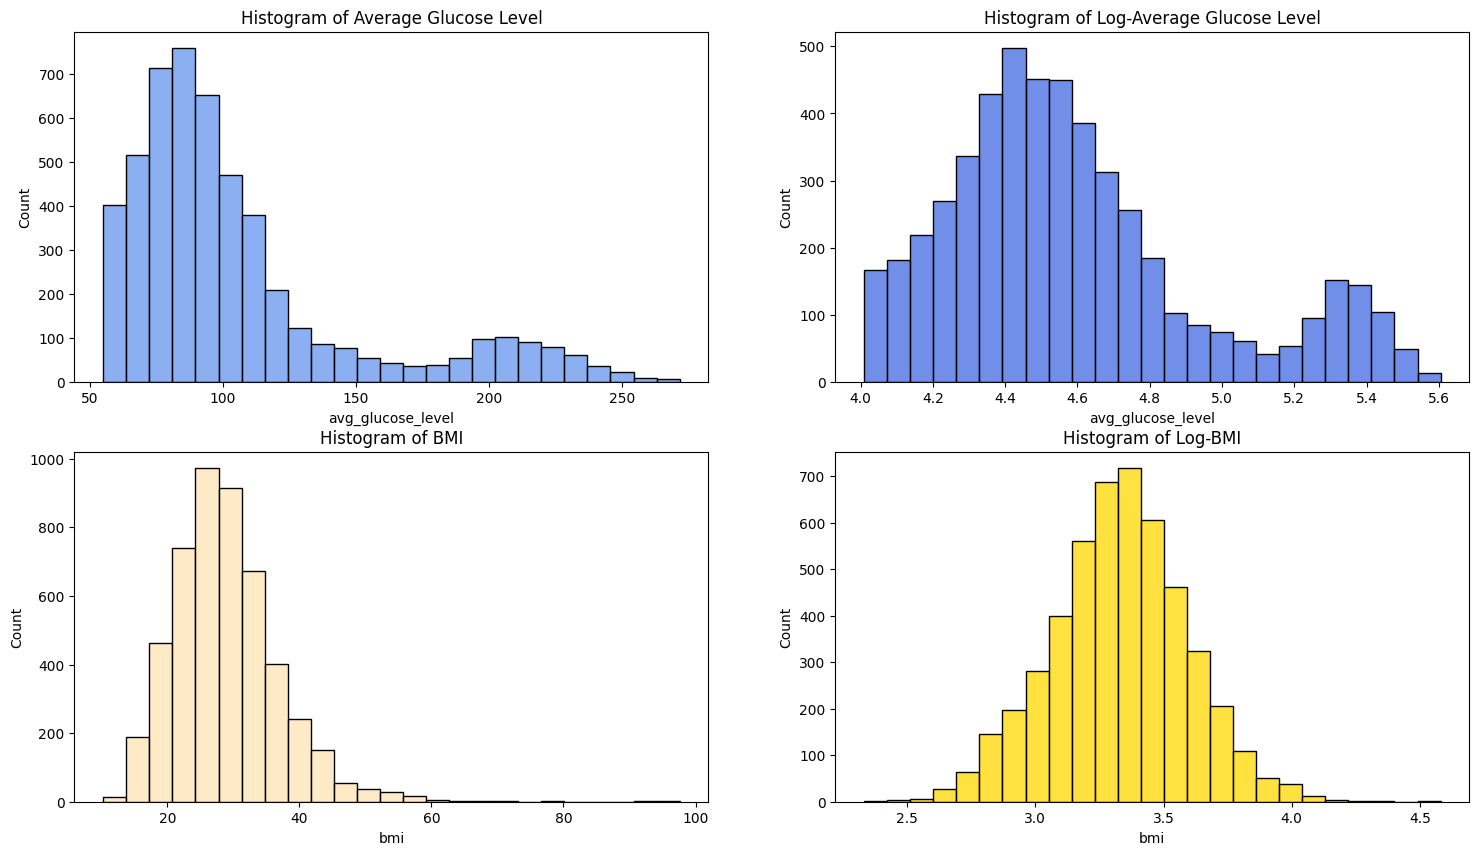

In [15]:
plt.figure(figsize=[18,10])
# Plotting a bar chart
plt.subplot(2, 2, 1)
plt.title('Histogram of Average Glucose Level')
sns.histplot(df.avg_glucose_level, bins=25,color = 'cornflowerblue')

plt.subplot(2, 2, 2)
plt.title('Histogram of Log-Average Glucose Level')
sns.histplot(np.log(df.avg_glucose_level), bins=25,color = 'royalblue')

plt.subplot(2, 2, 3)
plt.title('Histogram of BMI')
sns.histplot(df.bmi, bins=25,color = 'moccasin')

plt.subplot(2, 2, 4)
plt.title('Histogram of Log-BMI')
sns.histplot(np.log(df.bmi), bins=25,color = 'gold');

# Soru Glucose level icin bisey yapabilir miyiz ?

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: >

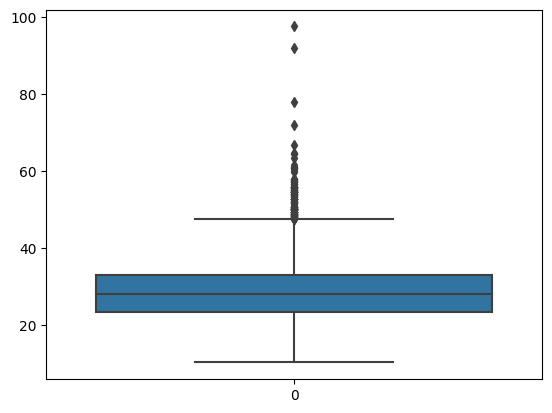

In [17]:
sns.boxplot(df['bmi'])

In [18]:
count_bmi = sum(value >= 49 for value in df['bmi'])
print(count_bmi)

filtered_rows = df[df['bmi'] <= 49]
filtered_rows_bmi_counts = sum(value == 0 for value in filtered_rows['stroke'])
print(filtered_rows_bmi_counts)

90
4611


{'whiskers': [<matplotlib.lines.Line2D at 0x7cd8cad9d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7cd8cad9db70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cd8cad9d390>],
 'medians': [<matplotlib.lines.Line2D at 0x7cd8cad9e0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cd8cad9e350>],
 'means': []}

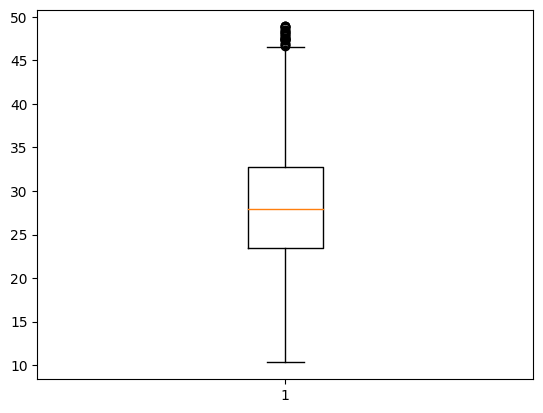

In [19]:
plt.boxplot(filtered_rows['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

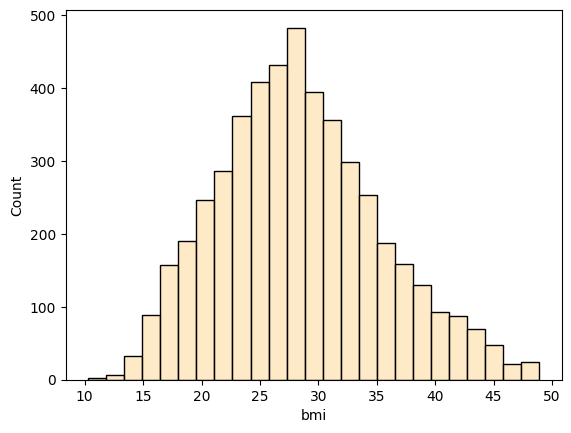

In [20]:
sns.histplot(filtered_rows.bmi, bins=25,color = 'moccasin')

<Axes: >

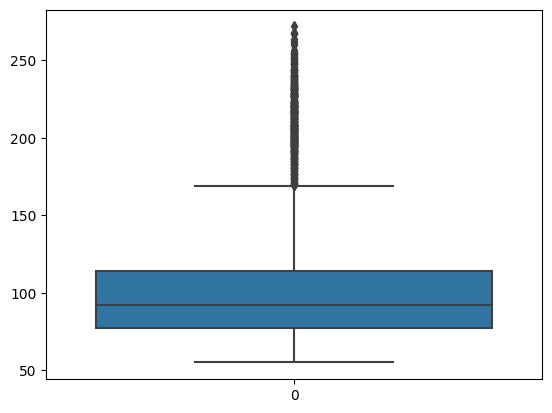

In [21]:
sns.boxplot(df['avg_glucose_level'])

In [22]:
count_agl = sum(value >= 175 for value in df['avg_glucose_level'])
print(count_agl)

removed_rows_agl = df[df['avg_glucose_level'] >= 175]
removed_rows_agl_counts = sum(value == 1 for value in removed_rows_agl['stroke'])
print(removed_rows_agl_counts)

603
81


**Findings ;**

* Dead due to a stroke is likely after the age 40-45.
* People don't have hypertension more likely die copared to
* if the average glucose level more than 290, stroke is more likely. 
* Employement can be an indicator for a stress level indicator for ou dataset. 
       Selfemployed is the - high stress
       Goverment employees - medium stress
       Children/ never worked - low stress
* BMI values after 49 looks like extremes and there is only 1 psotive value. Can be removed from dataset, In that case , log function is no needed.
* avg_glucose_level values after 175 looks like etxremes but there are 81 stroke positive rows that we would like to keep. Therefore, we may apply log function or define in another way like diabetes.

# 3. Feature Engineering

We tried to make a conculusion based on the dataset but the sample quatity of the stroke positive is too low. It is only 4.9 % stroke positive. Therefore, we need to use oversampling techniques to make a more accurate predictions. 

In [23]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [24]:
def stress_level(work):
    if 'Self-employed' in work:
        return 'High'
    elif 'Govt_job' in work or 'Private' in work:
        return 'Medium'
    elif 'children' in work or 'Never_worked' in work:
        return 'Low'

In [25]:
def diabates(avg_glucose_level):
    if avg_glucose_level > 126 :
        return 'diabetes'
    elif avg_glucose_level >= 100  and avg_glucose_level <= 126 :
        return 'prediabetes'
    elif  avg_glucose_level < 100 :
        return 'normal'

In [26]:
#Id column has unique values for each row. Therefore, it has been deleted. 
df.drop(columns = ['id'],inplace = True)
# Other as a gender classification stated once thus the row is deleted. 
df=df[df['gender'] != 'Other']

# In the dataset , positive values stated as 1 and negatives as 0. Same rule applied to ever_maried column. ever_married_num column is created and ever_maried is dropped.  
df['ever_married_num'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(columns =['ever_married'], inplace = True)

# Filling the BMI values in the same disturibiton 
for dataset in df:
    mean = df["bmi"].mean()
    std = df["bmi"].std()
    is_null = df["bmi"].isnull().sum()
    # Standart sapmayı kullanarak rastgele integer değerler oluşturma
    rand_bmi = np.random.randint(mean - std, mean + std, size = is_null)
    # Boş değerlerimizi oluşturduğumuz rastgele integer değerlerle doldurma
    bmi_slice = df["bmi"].copy()
    bmi_slice[np.isnan(bmi_slice)] = rand_bmi
    df["bmi"] = bmi_slice
    df["bmi"] = df['bmi'].astype(int)
df["bmi"].isnull().sum()

# Existing values for bmi and average glucose level are replaced with log values based on the results in code row 24. 
#df['bmi'] = np.log(df.bmi)
#df['avg_glucose_level'] = np.log(df.avg_glucose_level)

# Additional column for stress level 
df['stress_lvl'] = df['work_type'].apply(stress_level)
stress_lvl_num = {'High':2, 'Medium':1, 'Low':0}
df['stress_lvl']= df['stress_lvl'].map(stress_lvl_num)
df['diabetes'] = df['avg_glucose_level'].apply(diabates)


df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_num,stress_lvl,diabetes
0,Male,67.0,0,1,Private,Urban,228.69,36,formerly smoked,1,1,1,diabetes
1,Female,61.0,0,0,Self-employed,Rural,202.21,24,never smoked,1,1,2,diabetes
2,Male,80.0,0,1,Private,Rural,105.92,32,never smoked,1,1,1,prediabetes
3,Female,49.0,0,0,Private,Urban,171.23,34,smokes,1,1,1,diabetes
4,Female,79.0,1,0,Self-employed,Rural,174.12,24,never smoked,1,1,2,diabetes


In [27]:
df_dummies = pd.get_dummies(df[['gender','work_type','Residence_type','smoking_status']], drop_first=True)
df_1 = pd.concat([df,df_dummies],axis = 1)
df_1.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,...,diabetes,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Private,Urban,228.69,36,formerly smoked,1,...,diabetes,True,False,True,False,False,True,True,False,False
1,Female,61.0,0,0,Self-employed,Rural,202.21,24,never smoked,1,...,diabetes,False,False,False,True,False,False,False,True,False
2,Male,80.0,0,1,Private,Rural,105.92,32,never smoked,1,...,prediabetes,True,False,True,False,False,False,False,True,False
3,Female,49.0,0,0,Private,Urban,171.23,34,smokes,1,...,diabetes,False,False,True,False,False,True,False,False,True
4,Female,79.0,1,0,Self-employed,Rural,174.12,24,never smoked,1,...,diabetes,False,False,False,True,False,False,False,True,False


In [28]:
df_1.drop(columns = ['gender','work_type','Residence_type','smoking_status','diabetes'],inplace = True)
df_1.replace({True: 1, False: 0}, inplace=True)
df_1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_num,stress_lvl,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36,1,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,24,1,1,2,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32,1,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34,1,1,1,0,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24,1,1,2,0,0,0,1,0,0,0,1,0


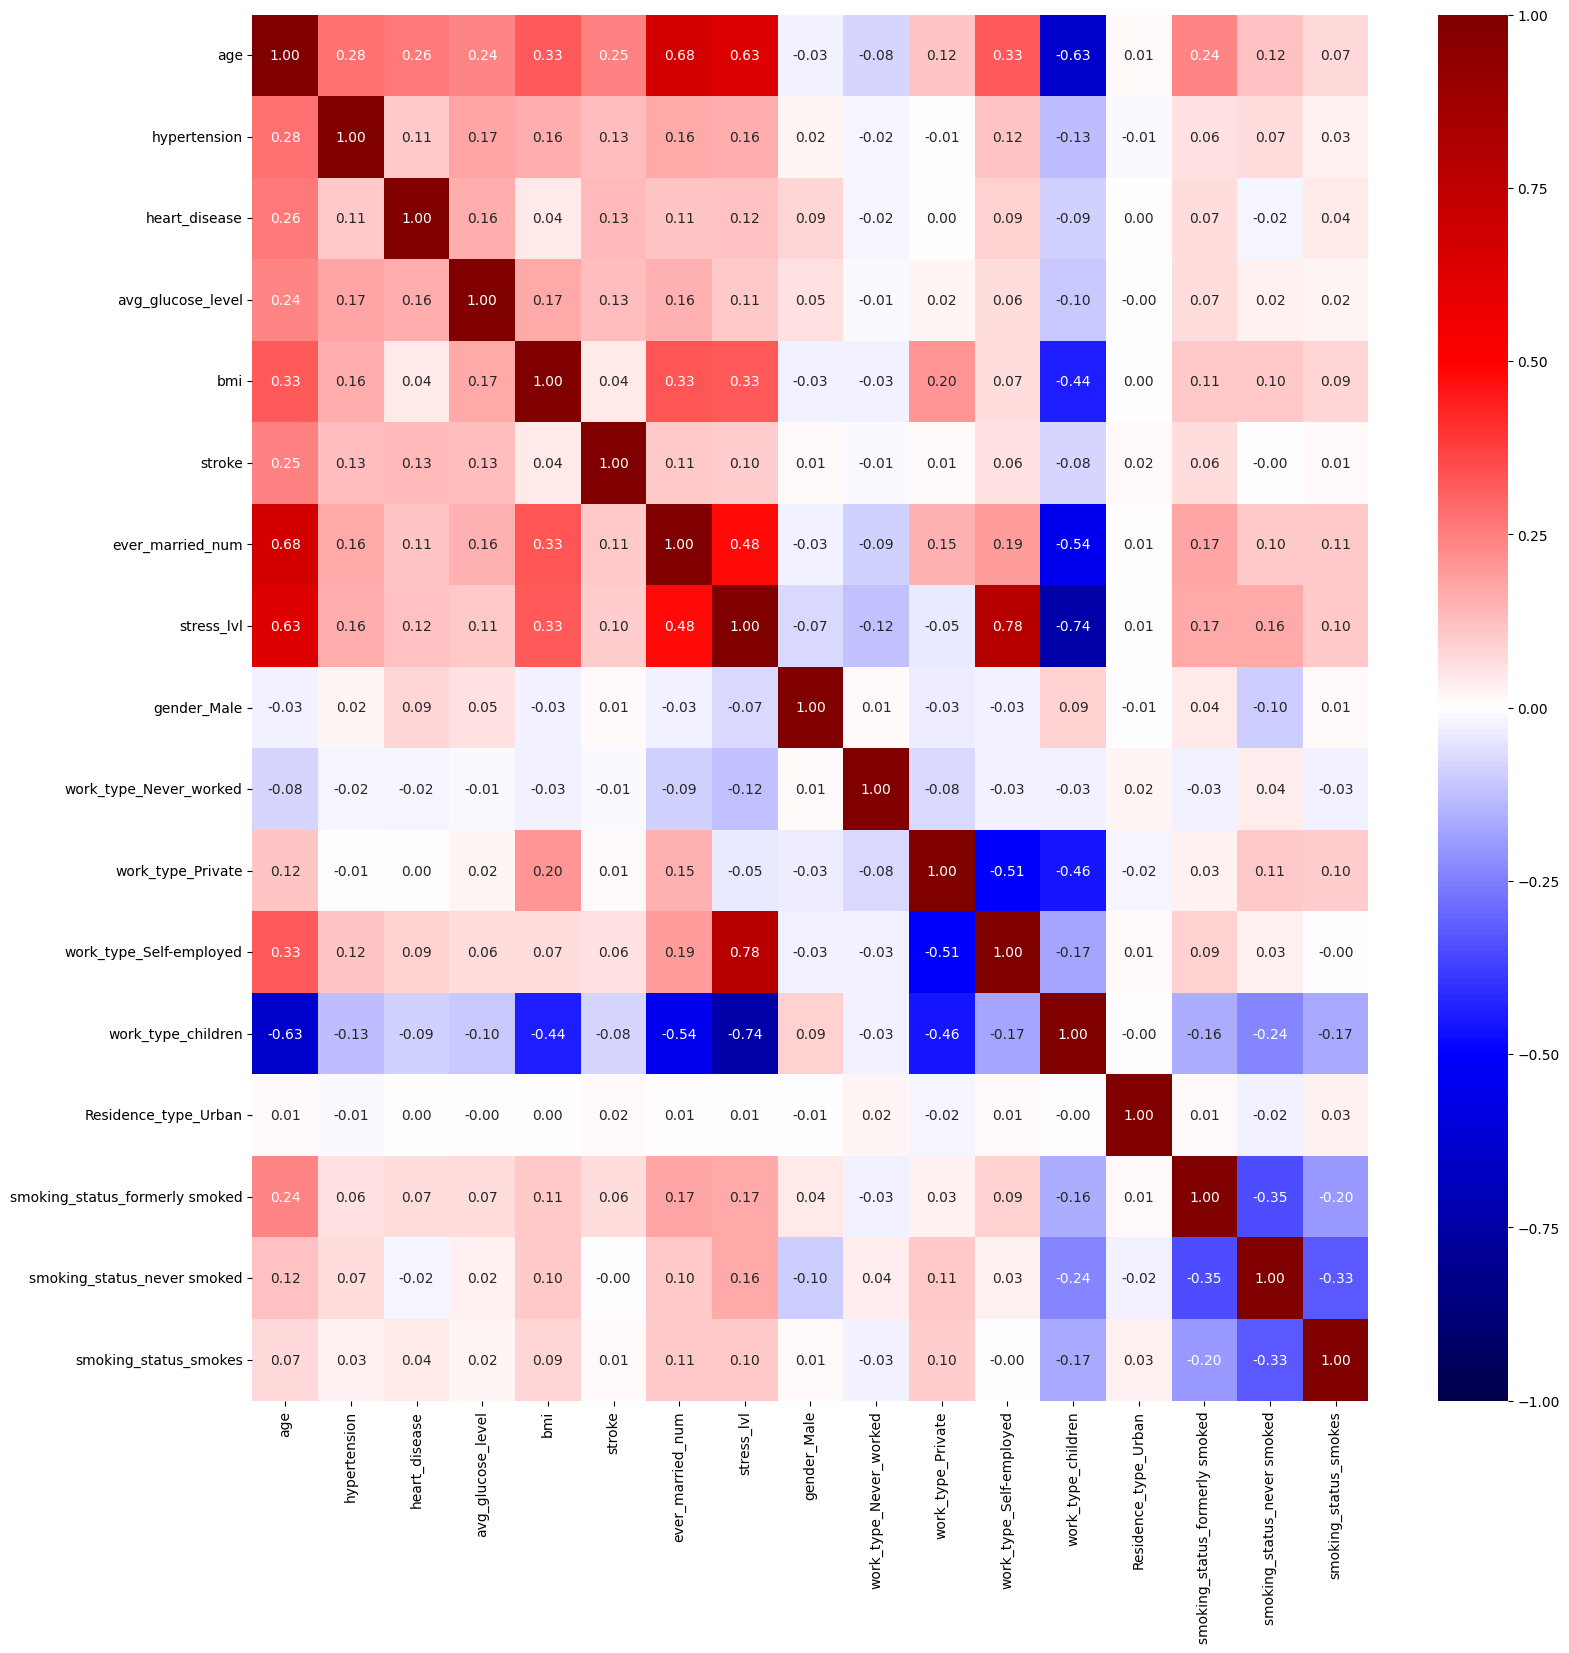

In [29]:
plt.figure(figsize=[18,18])
sns.heatmap(df_1.corr(), cmap="seismic", annot=True, fmt='.2f', vmin=-1, vmax=1);

# 4. Model

Before the model creation,oversampling techniques are need to be applied due to the stroke positive quantity. It is only 4.9 % stroke positive. 
We only have 5k rows thus we will not use understampling techniques.
Also, will only apply to train df not test.

In [30]:
# Seperating test and train dataframe from out dataframe. 20 % will be test and 80 train. 
X = df_1.drop(columns = ['stroke'])
y = df_1.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y parametresi veri setini bölme aşamasında train ve testteki label dağılımının dengeli olacağını söyler

In [31]:
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Stroke +', 'Stroke -'],
           yticklabels=['Stroke +', 'Stroke -']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [32]:
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')

knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_scaled, y_train, cv=5, scoring='accuracy')

svc = SVC()
acc_svc = cross_val_score(svc, X_train_scaled, y_train, cv=5, scoring='accuracy')

results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Logistic Regression,95.13,0.06
SVC,95.13,0.06
Random Forest,95.02,0.07
KNN,94.83,0.25
XGBoost,94.18,0.48
Perceptron,92.84,1.84
Decision Tree,90.88,0.22


0.9523809523809523


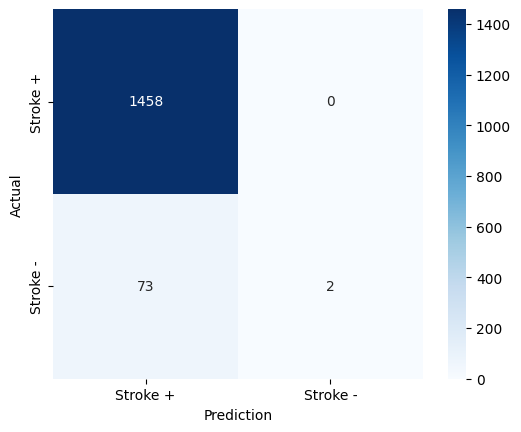

In [33]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))
make_confusion_matrix(logreg)

In [34]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [4,3], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [35]:
# A - Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#-------------------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='accuracy',)
print(acc_rf)

#-------------------------------------------------------------------------------------------------------------------
dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(acc_dt)

#-------------------------------------------------------------------------------------------------------------------
xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(acc_xgboost)

#-------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_resampled_scaled = std_scale.fit_transform(X_resampled)
X_test_resampled_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_resampled_scaled, y_resampled, cv=5, scoring='accuracy')
print(acc_logreg)

#-------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_resampled_scaled, y_resampled, cv=5, scoring='accuracy')
print(acc_knn)

#-------------------------------------------------------------------------------------------------------------------
perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_resampled_scaled, y_resampled, cv=5, scoring='accuracy')
print(acc_perc)

#-------------------------------------------------------------------------------------------------------------------
svc = SVC()
acc_svc = cross_val_score(svc, X_train_resampled_scaled, y_resampled, cv=5, scoring='accuracy')
print(acc_svc)

#-------------------------------------------------------------------------------------------------------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df


[0.99265246 0.99191771 0.99265246 0.99559148 0.99117647]
[0.97648788 0.9808964  0.97428361 0.97207935 0.975     ]
[0.97648788 0.96914034 0.97648788 0.9713446  0.97720588]
[0.7803086  0.76928729 0.78471712 0.7913299  0.78088235]
[0.94415871 0.91329904 0.92946363 0.93166789 0.93235294]
[0.70756796 0.71932403 0.71418075 0.74283615 0.64852941]
[0.83835415 0.82586334 0.86407054 0.85892726 0.85955882]


,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,99.28,0.15
Decision Tree,97.57,0.29
XGBoost,97.41,0.33
KNN,93.02,0.99
SVC,84.94,1.47
Logistic Regression,78.13,0.72
Perceptron,70.65,3.13


0.9445531637312459


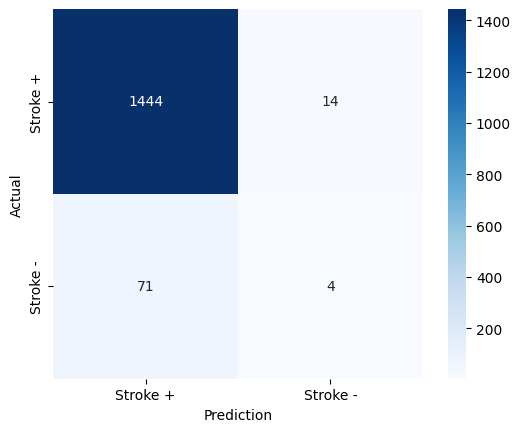

In [36]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
print(rf.score(X_test, y_test))
make_confusion_matrix(rf)

0.9145466405740378


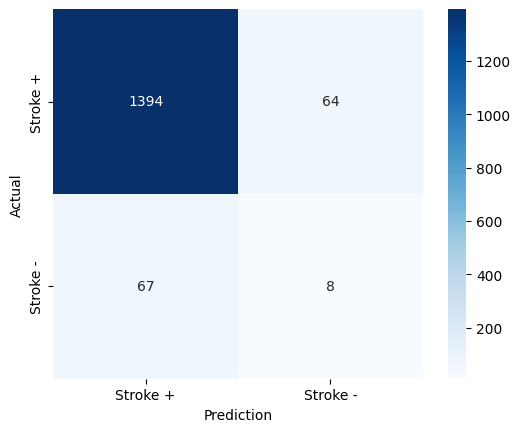

In [37]:
dt = DecisionTreeClassifier() 
dt.fit(X_resampled, y_resampled)
print(dt.score(X_test, y_test))
make_confusion_matrix(dt)

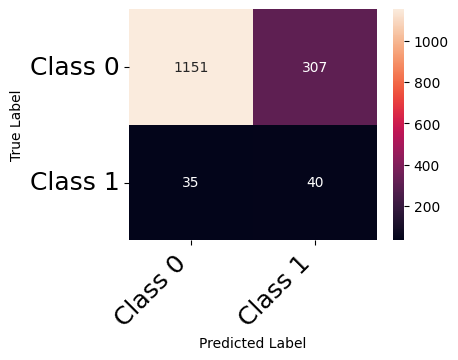

In [38]:
svc_ros = SVC().fit(X_train_resampled_scaled, y_resampled)
print_confusion_matrix(confusion_matrix(y_test, svc_ros.predict(X_test_resampled_scaled)), ['Class 0', 'Class 1'])


In [39]:
# B - SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train, y_train)

#-------------------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_smoted, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_smoted, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_smoted, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_smoted_scaled = std_scale.fit_transform(X_smoted)
X_test_smoted_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_smoted_scaled, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_smoted_scaled, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_smoted_scaled, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
svc = SVC()
acc_svc = cross_val_score(svc, X_train_smoted_scaled, y_smoted, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df


,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,95.31,2.67
Random Forest,95.06,3.09
Decision Tree,92.65,2.36
KNN,91.43,3.20
SVC,89.95,3.27
Logistic Regression,87.11,3.01
Perceptron,83.00,3.67


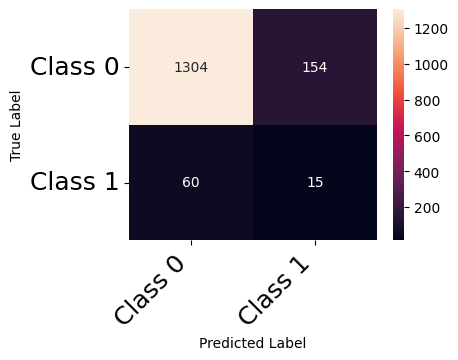

In [40]:
svc_ros = SVC().fit(X_train_smoted_scaled, y_smoted)
print_confusion_matrix(confusion_matrix(y_test, svc_ros.predict(X_test_smoted_scaled)), ['Class 0', 'Class 1'])

In [41]:
# C - ADASYN (Adaptive Synthetic Oversampling)
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

#-------------------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_adasyn, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_adasyn, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_adasyn, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_adasyn_scaled = std_scale.fit_transform(X_adasyn)
X_test_adasyn_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_adasyn_scaled, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_adasyn_scaled, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_adasyn_scaled, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
svc = SVC()
acc_svc = cross_val_score(svc, X_train_adasyn_scaled, y_adasyn, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df


,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
XGBoost,93.24,2.54
Random Forest,90.89,2.54
KNN,89.10,2.72
Decision Tree,87.47,2.98
SVC,87.45,3.43
Logistic Regression,86.33,3.74
Perceptron,80.44,1.28


In [42]:
# D - ADASYN (Adaptive Synthetic Oversampling)
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train, y_train)

#-------------------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_blsmote, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_blsmote, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_blsmote, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_blsmote_scaled = std_scale.fit_transform(X_blsmote)
X_test_blsmote_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_blsmote_scaled, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_blsmote_scaled, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_blsmote_scaled, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
svc = SVC()
acc_svc = cross_val_score(svc, X_train_blsmote_scaled, y_blsmote, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,95.74,3.12
XGBoost,95.74,2.72
Decision Tree,93.93,2.62
KNN,92.37,2.95
SVC,91.84,3.27
Logistic Regression,88.85,3.09
Perceptron,86.11,2.56


In [43]:
# E- Undersampling

from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(X_train, y_train)


#-------------------------------------------------------------------------------------------------------------------
rf = RandomForestClassifier()
acc_rf = cross_val_score(rf, X_under, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
dt = DecisionTreeClassifier() 
acc_dt = cross_val_score(dt, X_under, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
xgboost = XGBClassifier()
acc_xgboost = cross_val_score(xgboost, X_under, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_under_scaled = std_scale.fit_transform(X_under)
X_test_under_scaled = std_scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
acc_logreg = cross_val_score(logreg, X_train_under_scaled, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier()
acc_knn = cross_val_score(knn, X_train_under_scaled, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
perceptron = Perceptron()
acc_perc = cross_val_score(perceptron, X_train_under_scaled, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
svc = SVC()
acc_svc = cross_val_score(svc, X_train_under_scaled, y_under, cv=5, scoring='accuracy')

#-------------------------------------------------------------------------------------------------------------------
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Logistic Regression,75.27,5.18
Random Forest,74.10,5.78
SVC,73.25,4.73
XGBoost,70.67,3.52
KNN,70.14,5.12
Perceptron,68.07,8.10
Decision Tree,63.76,6.15


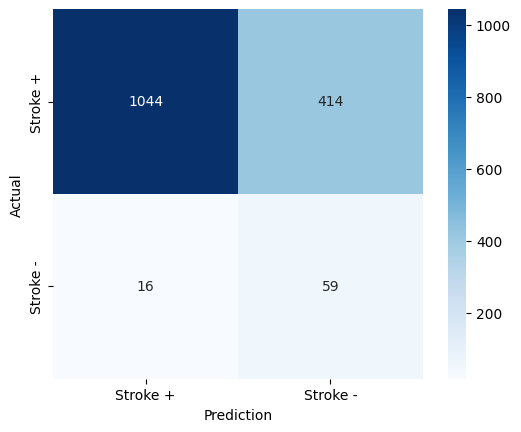

In [44]:
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
rf.score(X_test, y_test)
make_confusion_matrix(rf) # En başarılı olan modelimiz

In [45]:
# Import pickle Package

import pickle

In [46]:
Pkl_Filename = "Pickle_Stoke_Prediction_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)